# Human DiHS/DRESS and health human skin dataset

By Yang Zhou

This notebook reproduces the Fig 5 in the scInt paper. The data was obtained from Gene Expression Omnibus database with accession code: GSE132802

In [1]:
library(scInt)
source("C:/Users/ZhouYang/Desktop/reproducibility/utils.R")
fig.size <- function (height, width) {
    options(repr.plot.height = height, repr.plot.width = width, repr.plot.res = 300)
}

Warning message:
"package 'ggplot2' was built under R version 4.0.5"

********************************************************

Note: As of version 1.0.0, cowplot does not change the

  default ggplot2 theme anymore. To recover the previous

  behavior, execute:
  theme_set(theme_cowplot())

********************************************************



Attaching package: 'patchwork'


The following object is masked from 'package:cowplot':

    align_plots


Loading required package: RcppAnnoy

Warning message:
"package 'RcppAnnoy' was built under R version 4.0.3"
Warning message:
"package 'RColorBrewer' was built under R version 4.0.3"
Loading required package: grid

Loading required package: ggpubr

Warning message:
"package 'ggpubr' was built under R version 4.0.3"

Attaching package: 'ggpubr'


The following object is masked from 'package:cowplot':

    get_legend




## Load dataset and meta data

In [1]:
dataset = readRDS("C:/Users/ZhouYang/Desktop/reproducibility/Human_skin/dataset.rds")
meta = readRDS("C:/Users/ZhouYang/Desktop/reproducibility/Human_skin/meta.rds")
vargenes = readRDS("C:/Users/ZhouYang/Desktop/reproducibility/Human_skin/vargenes.rds")
dim(meta)
length(vargenes)

[1] 20423     3

[1] 2109

In [2]:
summary(as.factor(meta$batchlb))

DiHS/DRESS      HV1_1      HV1_2        HV2        HV3        HV4        HV5 
      5653       1157       1920       4016       4923       1589       1165

## Run scInt integration

In [3]:
# run integration
data <- create.scInt(dataset, meta)
data <- normalize.Data(data)
data <- ident.cellIdentity(data, vargenes = vargenes)
data <- compute.Similarity(data, k = 5, T_th = 0.75, dims = 50)
data <- run.Integrate(data, npcs = 40, lambda = 5)
data <- run.umap(data, min_dist = .1)

0 cells are filtered in the DiHS/DRESS

5 cells are filtered in the HV1_1

3 cells are filtered in the HV1_2

0 cells are filtered in the HV2

0 cells are filtered in the HV3

0 cells are filtered in the HV4

0 cells are filtered in the HV5

0 genes are filtered

Warning message:
"Feature names cannot have underscores ('_'), replacing with dashes ('-')"
Warning message:
"Feature names cannot have underscores ('_'), replacing with dashes ('-')"
Warning message:
"Feature names cannot have underscores ('_'), replacing with dashes ('-')"
Warning message:
"Feature names cannot have underscores ('_'), replacing with dashes ('-')"
Warning message:
"Feature names cannot have underscores ('_'), replacing with dashes ('-')"
Warning message:
"Feature names cannot have underscores ('_'), replacing with dashes ('-')"
Warning message:
"Feature names cannot have underscores ('_'), replacing with dashes ('-')"
Compute the Adjusted Cross-batch Similarity

Find similar cells for batch 1

Done!

Find sim

Time difference of 2.152568 mins
Time difference of 1.572366 mins


## Visualization

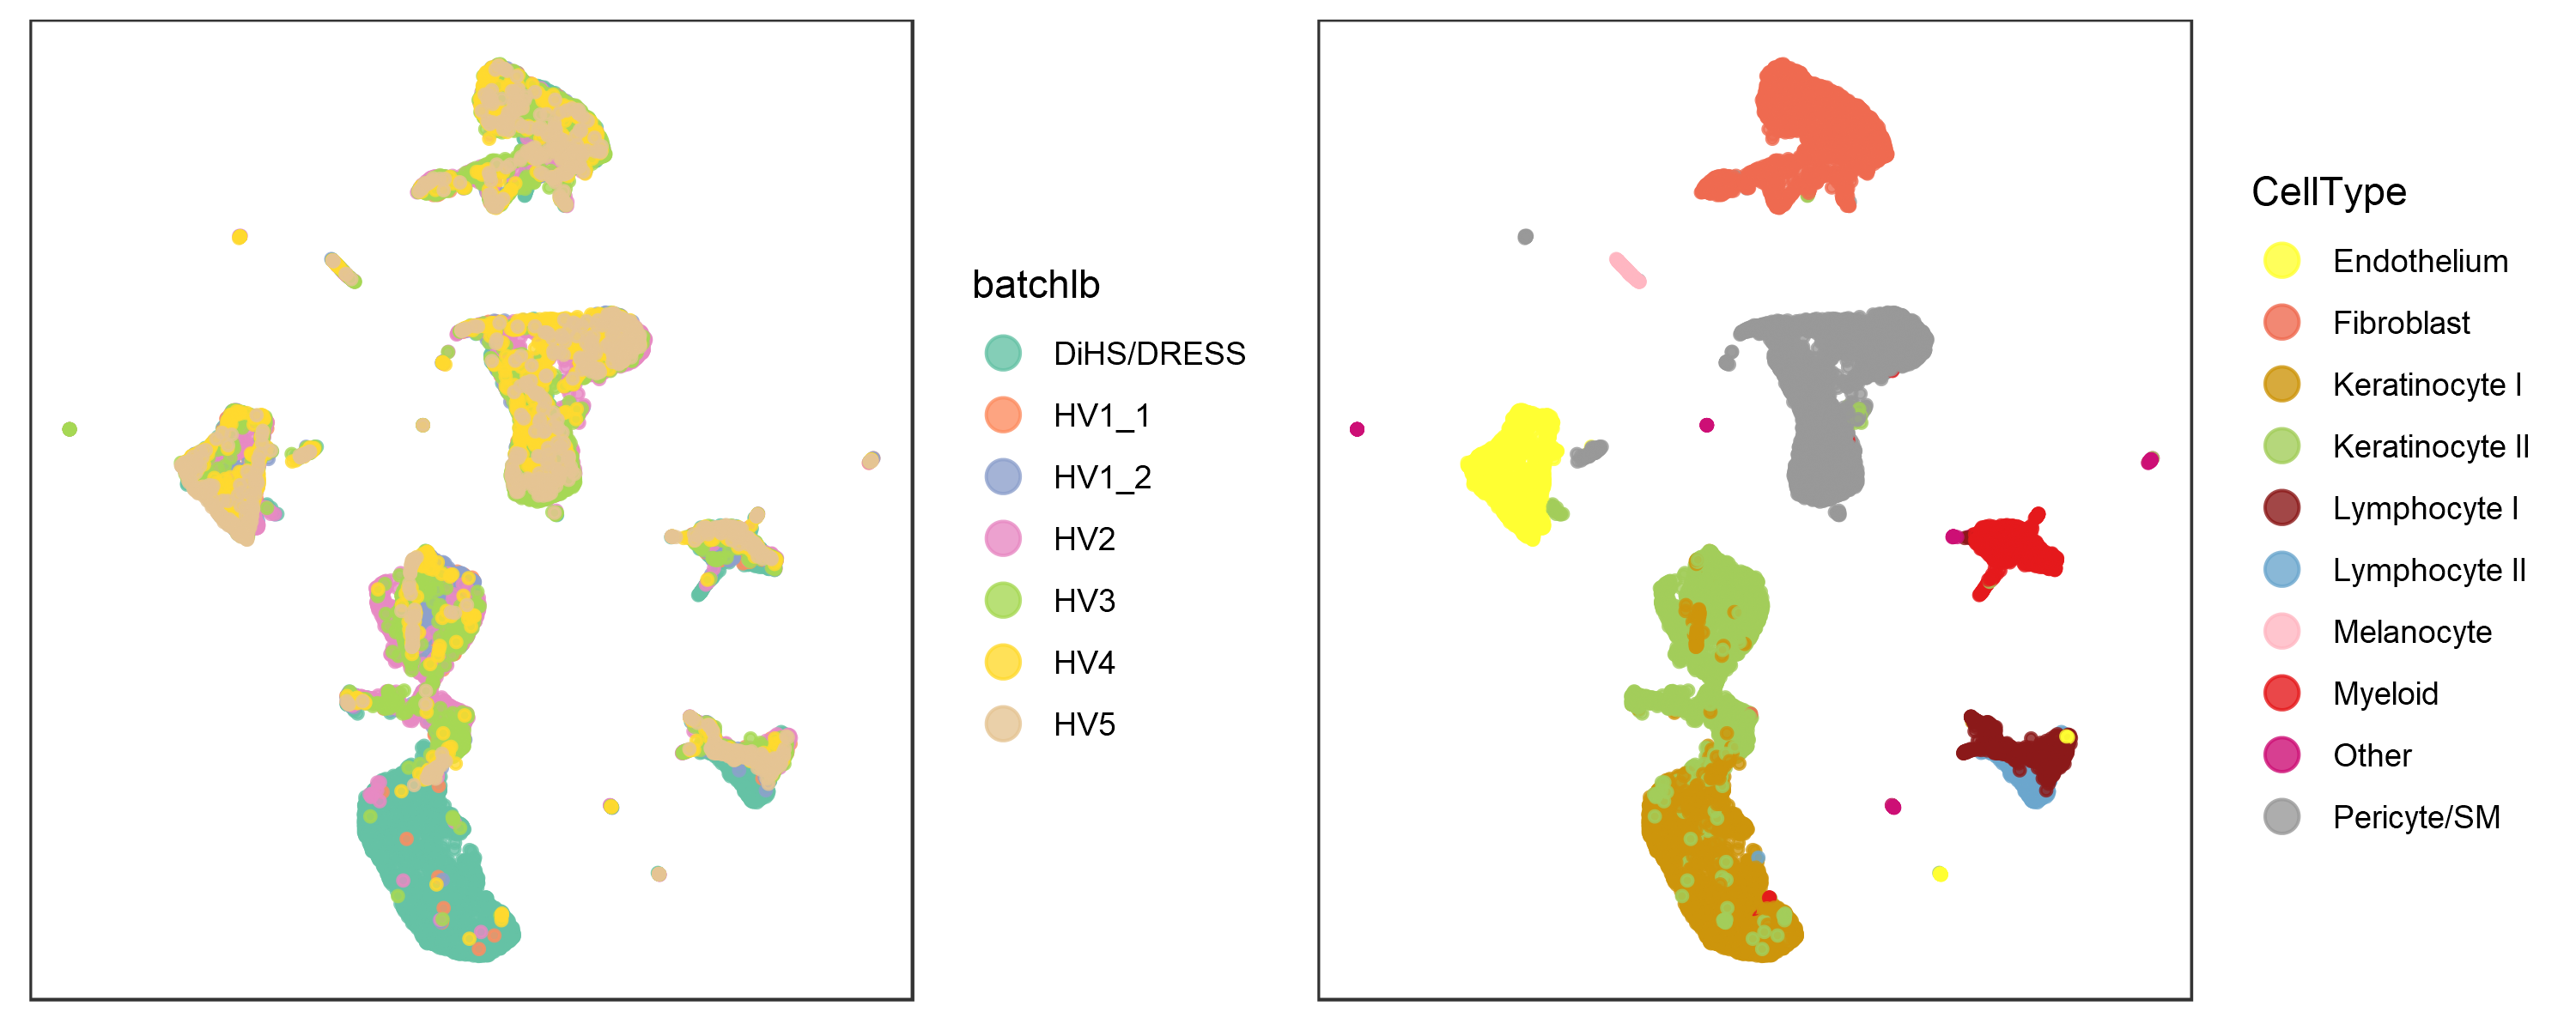

In [4]:
p1 <- dim.plot(data@int.umap, data@meta, colFactor = "batchlb", col.rev = T, size = 1)
p2 <- dim.plot(data@int.umap, data@meta, colFactor = "CellType", size = 1)
fig.size(4, 10)
cowplot::plot_grid(p1, p2)

In [5]:
sessionInfo()

R version 4.0.2 (2020-06-22)
Platform: x86_64-w64-mingw32/x64 (64-bit)
Running under: Windows 10 x64 (build 19044)

Matrix products: default

locale:
[1] LC_COLLATE=Chinese (Simplified)_China.936 
[2] LC_CTYPE=Chinese (Simplified)_China.936   
[3] LC_MONETARY=Chinese (Simplified)_China.936
[4] LC_NUMERIC=C                              
[5] LC_TIME=Chinese (Simplified)_China.936    

attached base packages:
[1] grid      stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] gtable_0.3.0       pheatmap_1.0.12    gridExtra_2.3      ggpubr_0.4.0      
 [5] RColorBrewer_1.1-2 RcppAnnoy_0.0.18   patchwork_1.0.1    cowplot_1.0.0     
 [9] ggplot2_3.3.5      scInt_1.0         

loaded via a namespace (and not attached):
  [1] readxl_1.3.1          uuid_1.0-4            backports_1.1.7      
  [4] RcppEigen_0.3.3.9.1   plyr_1.8.6            igraph_1.2.5         
  [7] repr_1.1.4            lazyeval_0.2.2        splines_4.0.2        
 [10] liste